<a href="https://colab.research.google.com/github/KaggleStudy4th/4th_kaggle_study/blob/main/%EC%8B%A4%EC%8A%B5%EC%BD%94%EB%93%9C/20%EC%A3%BC%EC%B0%A8/DNN_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# mnist_softmax_SGD.

In [1]:
import torch
import torchvision.datasets as data
import torchvision.transforms as transforms
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [3]:
learning_rate=0.001
training_epochs=15
batch_size=100

In [5]:
#저장경로 학습/테스트 데이터 선택 : true 학습 데이터 transform:download:

mnist_train=data.MNIST(root='MNIST_data/',
                       train=True,
                       transform=transforms.ToTensor(),
                       download=True)

mnist_test=data.MNIST(root='MNIST_data/',
                      train=False,
                      transform=transforms.ToTensor(),
                      download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [7]:
data_loader=torch.utils.data.DataLoader(dataset=mnist_train,
                                        batch_size=batch_size,
                                        shuffle=True,
                                        drop_last=True)

In [8]:
linear=torch.nn.Linear(784,10,bias=True)

In [9]:
torch.nn.init.normal_(linear.weight)

Parameter containing:
tensor([[-0.1953, -0.4404,  0.0139,  ...,  0.7510,  1.5190,  0.9637],
        [ 0.4146, -1.0660, -0.9969,  ..., -0.3259, -0.2695, -1.3316],
        [ 0.2600, -1.1821,  0.0065,  ...,  1.0648, -1.2251,  0.9841],
        ...,
        [ 0.0279, -1.7242, -1.1723,  ...,  1.3651, -0.0689, -0.7931],
        [ 0.0952,  0.1939,  0.1636,  ..., -1.0489,  0.6224, -1.7181],
        [ 2.6504,  0.6297, -1.6571,  ..., -0.0781, -1.1398, -0.8711]],
       requires_grad=True)

In [11]:
model = torch.nn.Sequential(linear).to(device) # 'cuda'

In [12]:
model

Sequential(
  (0): Linear(in_features=784, out_features=10, bias=True)
)

In [13]:
loss=torch.nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [14]:
total_batch=len(data_loader)

for epoch in range(training_epochs):
  avg_cost=0

  for X,Y in data_loader:
    #(1000,1,28,28) 크기의 텐서를 (1000,784) 크기의 텐서로 변형
    X=X.view(-1,28*28).to(device)
    #one-hot encoding되어있지 않음
    Y=Y.to(device)

    optimizer.zero_grad()
    hypothesis=model(X)
    cost=loss(hypothesis,Y)
    cost.backward()
    optimizer.step()
 
    #평균 Error 계산
    avg_cost+=cost/total_batch

  print('Epoch:','%04d' %(epoch+1),'cost =','{:.9f}'.format(avg_cost))


Epoch: 0001 cost = 14.412130356
Epoch: 0002 cost = 12.303293228
Epoch: 0003 cost = 10.895567894
Epoch: 0004 cost = 9.731601715
Epoch: 0005 cost = 8.741955757
Epoch: 0006 cost = 7.915795326
Epoch: 0007 cost = 7.235562325
Epoch: 0008 cost = 6.667675495
Epoch: 0009 cost = 6.180422306
Epoch: 0010 cost = 5.753479004
Epoch: 0011 cost = 5.375113487
Epoch: 0012 cost = 5.038181305
Epoch: 0013 cost = 4.737372398
Epoch: 0014 cost = 4.468423843
Epoch: 0015 cost = 4.227678776


In [15]:
#test the model using test sets

with torch.no_grad():
  X_test=mnist_test.test_data.view(-1,28*28).float().to(device)
  Y_test=mnist_test.test_labels.to(device)

  prediction=model(X_test)
  correct_prediction=torch.argmax(prediction,1)==Y_test
  accuracy=correct_prediction.float().mean()
  print('accuracy:',accuracy.item())

accuracy: 0.42160001397132874


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [16]:
#랜덤테스트
r=random.randint(0,len(mnist_test)-1)
X_single_data=mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
Y_single_data=mnist_test.test_labels[r:r+1].to(device)

print('Label:',Y_single_data.item())
single_prediction=model(X_single_data)
print('prediction: ',torch.argmax(single_prediction,1).item())

Label: 8
prediction:  7


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([8])


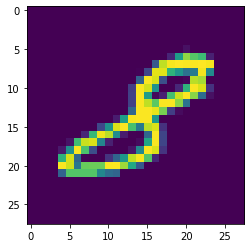

In [20]:
import matplotlib.pyplot as plt

plt.imshow(X_single_data.reshape(28,28).cpu())
print(Y_single_data)

# mnist_softmax_Adam

In [21]:
linear=torch.nn.Linear(784,10,bias=True)
#bias는 false로 설정되어있으면 layer는 bias를 학습하지 않는다. 기본값은 true임. 

In [23]:
torch.nn.init.normal_(linear.weight)

Parameter containing:
tensor([[ 0.1634, -0.3352,  0.0314,  ...,  1.1919, -0.4502,  0.3965],
        [-1.0368, -0.1780, -0.5245,  ..., -0.9530,  0.5088, -0.6242],
        [ 0.1055, -0.1815,  0.2085,  ...,  2.0076, -0.8664, -0.5713],
        ...,
        [-2.0019,  0.9543,  0.9286,  ...,  0.3023,  1.3302,  0.5574],
        [-0.5494, -1.1774,  1.5653,  ..., -1.0313, -0.5681, -2.2044],
        [-0.8974, -0.0055,  0.3807,  ..., -0.8308,  1.1178,  2.1534]],
       requires_grad=True)

In [24]:
model=torch.nn.Sequential(linear).to(device)

In [26]:
loss=torch.nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [27]:
total_batch=len(data_loader)

for epoch in range(training_epochs):
  avg_cost=0

  for X,Y in data_loader:
    X=X.view(-1,28*28).to(device)
    Y=Y.to(device)

    optimizer.zero_grad()
    hypothesis=model(X)
    cost=loss(hypothesis,Y)
    cost.backward()
    optimizer.step()

    avg_cost+=cost/total_batch

  print('Epoch: ','%04d' %(epoch+1),'cost=','{:.9f}'.format(avg_cost))


Epoch:  0001 cost= 5.614291191
Epoch:  0002 cost= 1.682482839
Epoch:  0003 cost= 1.108348846
Epoch:  0004 cost= 0.871366560
Epoch:  0005 cost= 0.738542557
Epoch:  0006 cost= 0.652831018
Epoch:  0007 cost= 0.593087435
Epoch:  0008 cost= 0.548593819
Epoch:  0009 cost= 0.514018297
Epoch:  0010 cost= 0.486797869
Epoch:  0011 cost= 0.463550925
Epoch:  0012 cost= 0.444490016
Epoch:  0013 cost= 0.428525835
Epoch:  0014 cost= 0.413917542
Epoch:  0015 cost= 0.401334196


In [29]:
with torch.no_grad():
  X_test=mnist_test.test_data.view(-1,28*28).float().to(device)
  Y_test=mnist_test.test_labels.to(device)

  prediction=model(X_test)
  correct_prediction=torch.argmax(prediction,1)==Y_test
  accuracy=correct_prediction.float().mean()
  print('accuracy: ',accuracy.item())

accuracy:  0.8924000263214111


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [30]:
# 랜덤 테스트
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

print('Label: ', Y_single_data.item())
single_prediction = model(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

Label:  5
Prediction:  3


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([5])


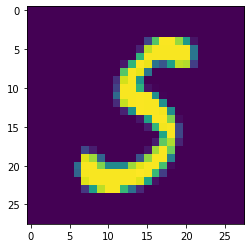

In [31]:
import matplotlib.pyplot as plt
plt.imshow(X_single_data.reshape(28,28).cpu())
print(Y_single_data)

#NN

In [33]:
data_loader=torch.utils.data.DataLoader(dataset=mnist_train,
                                        batch_size=batch_size,
                                        shuffle=True,
                                        drop_last=True)

In [34]:
linear1=torch.nn.Linear(784,256,bias=True)
linear2=torch.nn.Linear(256,256,bias=True)
linear3=torch.nn.Linear(256,10,bias=True)
relu=torch.nn.ReLU()

In [36]:
torch.nn.init.normal_(linear1.weight)
torch.nn.init.normal_(linear2.weight)
torch.nn.init.normal_(linear3.weight)

Parameter containing:
tensor([[ 0.1433, -0.5848, -1.2871,  ...,  0.1365, -0.6771, -1.2218],
        [ 0.3133, -0.6922, -0.4266,  ..., -1.0904, -0.5532, -0.5666],
        [ 0.4819, -0.8147,  0.7415,  ...,  0.8396, -0.1836,  2.0754],
        ...,
        [ 0.2445, -0.8987, -1.7621,  ...,  2.0461, -1.1659, -0.5037],
        [ 0.6488,  0.0395,  0.5761,  ..., -0.7756, -0.2757, -1.3476],
        [ 0.5010, -0.0942,  0.2242,  ...,  1.2468, -0.5346,  0.2344]],
       requires_grad=True)

In [37]:
model=torch.nn.Sequential(linear1,relu,linear2,relu,linear3).to(device)

In [38]:
loss=torch.nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [39]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:

        # (1000, 1, 28, 28) 크기의 텐서를 (1000, 784) 크기의 텐서로 변형
        X = X.view(-1, 28 * 28).to(device)
        # one-hot encoding되어 있지 않음
        Y = Y.to(device)
        #%debug

        # 그래디언트 초기화
        optimizer.zero_grad()
        # Forward 계산
        hypothesis = model(X)
        # Error 계산
        cost = loss(hypothesis, Y)
        # Backparopagation
        cost.backward()
        # 가중치 갱신
        optimizer.step()

        # 평균 Error 계산
        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 151.744277954
Epoch: 0002 cost = 38.019424438
Epoch: 0003 cost = 23.869844437
Epoch: 0004 cost = 16.533475876
Epoch: 0005 cost = 12.029699326
Epoch: 0006 cost = 8.957776070
Epoch: 0007 cost = 6.778704643
Epoch: 0008 cost = 4.962552547
Epoch: 0009 cost = 3.764966249
Epoch: 0010 cost = 2.778804064
Epoch: 0011 cost = 2.029551744
Epoch: 0012 cost = 1.625326633
Epoch: 0013 cost = 1.240280271
Epoch: 0014 cost = 1.016408563
Epoch: 0015 cost = 0.787618697
Learning finished


In [40]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.9491999745368958


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [41]:
# 랜덤 테스트
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

print('Label: ', Y_single_data.item())
single_prediction = model(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

Label:  7
Prediction:  7


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([7])


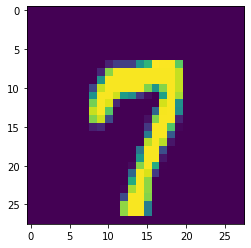

In [42]:
import matplotlib.pyplot as plt
plt.imshow(X_single_data.reshape(28,28).cpu())
print(Y_single_data)

# nn_xavier

In [43]:
linear1 = torch.nn.Linear(784,256,bias=True)
linear2 = torch.nn.Linear(256,256,bias=True)
linear3 = torch.nn.Linear(256,10,bias=True)
relu = torch.nn.ReLU()

In [44]:
# Random Init => Xavier Init
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)

Parameter containing:
tensor([[ 0.1063, -0.0732,  0.1492,  ...,  0.0276,  0.1120,  0.0946],
        [-0.1453,  0.1473,  0.0408,  ...,  0.1216,  0.0676,  0.0574],
        [-0.0819, -0.0709, -0.1136,  ...,  0.0053,  0.0530, -0.1025],
        ...,
        [-0.0561,  0.0672,  0.0926,  ...,  0.1199, -0.1094,  0.1500],
        [ 0.1065, -0.0737,  0.0638,  ..., -0.0610,  0.1423,  0.1127],
        [-0.0392, -0.1086, -0.0833,  ..., -0.0604,  0.1369, -0.0792]],
       requires_grad=True)

In [45]:
model=torch.nn.Sequential(linear1,relu,linear2,relu,linear3).to(device)

In [47]:
model

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=10, bias=True)
)

In [48]:
loss=torch.nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [49]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:

        # (1000, 1, 28, 28) 크기의 텐서를 (1000, 784) 크기의 텐서로 변형
        X = X.view(-1, 28 * 28).to(device)
        # one-hot encoding되어 있지 않음
        Y = Y.to(device)
        #%debug

        # 그래디언트 초기화
        optimizer.zero_grad()
        # Forward 계산
        hypothesis = model(X)
        # Error 계산
        cost = loss(hypothesis, Y)
        # Backparopagation
        cost.backward()
        # 가중치 갱신
        optimizer.step()

        # 평균 Error 계산
        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.239859194
Epoch: 0002 cost = 0.091976449
Epoch: 0003 cost = 0.060934443
Epoch: 0004 cost = 0.045493159
Epoch: 0005 cost = 0.034469225
Epoch: 0006 cost = 0.027829496
Epoch: 0007 cost = 0.020512762
Epoch: 0008 cost = 0.018400710
Epoch: 0009 cost = 0.015128742
Epoch: 0010 cost = 0.014211728
Epoch: 0011 cost = 0.013758255
Epoch: 0012 cost = 0.011961517
Epoch: 0013 cost = 0.012534533
Epoch: 0014 cost = 0.010166365
Epoch: 0015 cost = 0.005991415
Learning finished


In [51]:
with torch.no_grad():
  X_test=mnist_test.test_data.view(-1,28*28).float().to(device)
  Y_test=mnist_test.test_labels.to(device)

  prediction=model(X_test)
  correct_prediction=torch.argmax(prediction,1)==Y_test
  accuracy=correct_prediction.float().mean()
  print('Accuracy :',accuracy.item())

Accuracy : 0.9793000221252441


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [52]:
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

print('Label: ', Y_single_data.item())
single_prediction = model(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

Label:  9
Prediction:  9


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([9])


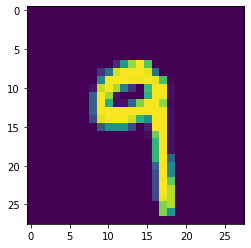

In [53]:
plt.imshow(X_single_data.reshape(28,28).cpu())
print(Y_single_data)

# DNN_xavier

In [55]:
linear1=torch.nn.Linear(784,512,bias=True)
linear2=torch.nn.Linear(512,512,bias=True)
linear3=torch.nn.Linear(512,512,bias=True)
linear4=torch.nn.Linear(512,512,bias=True)
linear5=torch.nn.Linear(512,10,bias=True)
relu=torch.nn.ReLU()

In [56]:
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)

Parameter containing:
tensor([[-0.0443,  0.0701,  0.0214,  ...,  0.0111,  0.0200,  0.0612],
        [-0.0552, -0.0209,  0.0327,  ...,  0.0281, -0.0208,  0.0007],
        [-0.0075,  0.0184,  0.0340,  ...,  0.0308,  0.0581, -0.0895],
        ...,
        [-0.0821, -0.1007,  0.0710,  ..., -0.0753, -0.0535,  0.0151],
        [ 0.0203,  0.0918, -0.0716,  ...,  0.0831,  0.0444, -0.0927],
        [ 0.0624,  0.0644,  0.0963,  ...,  0.0061,  0.1014,  0.0586]],
       requires_grad=True)

In [57]:
model=torch.nn.Sequential(
    linear1,
    relu,
    linear2,
    relu,
    linear3,
    relu,
    linear4,
    relu,
    linear5
)

In [58]:
model

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=512, bias=True)
  (5): ReLU()
  (6): Linear(in_features=512, out_features=512, bias=True)
  (7): ReLU()
  (8): Linear(in_features=512, out_features=10, bias=True)
)

In [59]:
loss=torch.nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [60]:

total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:

        # (1000, 1, 28, 28) 크기의 텐서를 (1000, 784) 크기의 텐서로 변형
        X = X.view(-1, 28 * 28).to(device)
        # one-hot encoding되어 있지 않음
        Y = Y.to(device)
        #%debug

        # 그래디언트 초기화
        optimizer.zero_grad()
        # Forward 계산
        hypothesis = model(X)
        # Error 계산
        cost = loss(hypothesis, Y)
        # Backparopagation
        cost.backward()
        # 가중치 갱신
        optimizer.step()

        # 평균 Error 계산
        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.214061603
Epoch: 0002 cost = 0.090455644
Epoch: 0003 cost = 0.064092956
Epoch: 0004 cost = 0.049463991
Epoch: 0005 cost = 0.040844675
Epoch: 0006 cost = 0.033936854
Epoch: 0007 cost = 0.030124709
Epoch: 0008 cost = 0.026166433
Epoch: 0009 cost = 0.024104083
Epoch: 0010 cost = 0.020828515
Epoch: 0011 cost = 0.020715179
Epoch: 0012 cost = 0.017590310
Epoch: 0013 cost = 0.019117691
Epoch: 0014 cost = 0.012436524
Epoch: 0015 cost = 0.016571820
Learning finished


In [61]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9786999821662903


In [62]:
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

print('Label: ', Y_single_data.item())
single_prediction = model(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

Label:  3
Prediction:  3


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([3])


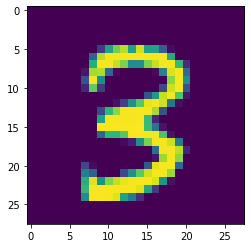

In [63]:
import matplotlib.pyplot as plt
plt.imshow(X_single_data.reshape(28,28).cpu())
print(Y_single_data)

# DNN_xavier_dropout

In [65]:
learning_rate=0.001
training_epochs=15
batch_size=100
drop_prob=0.3

In [66]:
linear1=torch.nn.Linear(784,512,bias=True)
linear2=torch.nn.Linear(512,512,bias=True)
linear3=torch.nn.Linear(512,512,bias=True)
linear4=torch.nn.Linear(512,512,bias=True)
linear5=torch.nn.Linear(512,10,bias=True)
relu=torch.nn.ReLU()
dropout=torch.nn.Dropout(p=drop_prob)

In [67]:
# Random Init => Xavier Init
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)

Parameter containing:
tensor([[-0.0844,  0.0975,  0.0863,  ...,  0.0765,  0.0722, -0.0280],
        [-0.0962, -0.0771,  0.1062,  ...,  0.0040,  0.0115,  0.0902],
        [-0.0320,  0.0188, -0.0571,  ...,  0.0423,  0.0498,  0.0024],
        ...,
        [-0.0272,  0.0951, -0.0677,  ...,  0.0477, -0.0730,  0.0834],
        [-0.0895,  0.0089, -0.0985,  ..., -0.0918,  0.0964, -0.0709],
        [ 0.0985, -0.0460, -0.0130,  ...,  0.0633, -0.1067, -0.0223]],
       requires_grad=True)

In [68]:
model=torch.nn.Sequential(linear1,relu,dropout,
                          linear2,relu,dropout,
                          linear3,relu,dropout,
                          linear4,relu,dropout,
                          linear5).to(device)

In [69]:
model

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=512, out_features=512, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.3, inplace=False)
  (9): Linear(in_features=512, out_features=512, bias=True)
  (10): ReLU()
  (11): Dropout(p=0.3, inplace=False)
  (12): Linear(in_features=512, out_features=10, bias=True)
)

In [71]:
loss=torch.nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [72]:
total_batch = len(data_loader)

model.train() 
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:

        # (1000, 1, 28, 28) 크기의 텐서를 (1000, 784) 크기의 텐서로 변형
        X = X.view(-1, 28 * 28).to(device)
        # one-hot encoding되어 있지 않음
        Y = Y.to(device)
        #%debug

        # 그래디언트 초기화
        optimizer.zero_grad()
        # Forward 계산
        hypothesis = model(X)
        # Error 계산
        cost = loss(hypothesis, Y)
        # Backparopagation
        cost.backward()
        # 가중치 갱신
        optimizer.step()

        # 평균 Error 계산
        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.305547923
Epoch: 0002 cost = 0.147066548
Epoch: 0003 cost = 0.111166954
Epoch: 0004 cost = 0.094251446
Epoch: 0005 cost = 0.082160942
Epoch: 0006 cost = 0.076161042
Epoch: 0007 cost = 0.070585564
Epoch: 0008 cost = 0.059836168
Epoch: 0009 cost = 0.059161976
Epoch: 0010 cost = 0.056331452
Epoch: 0011 cost = 0.052290827
Epoch: 0012 cost = 0.046545047
Epoch: 0013 cost = 0.044369224
Epoch: 0014 cost = 0.047213692
Epoch: 0015 cost = 0.043976143
Learning finished


In [73]:
# Test the model using test sets
with torch.no_grad():
    model.eval()  # 주의사항 (dropout=False)
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9790999889373779


In [89]:
r=random.randint(0,len(mnist_test)-1)
X_single_data=mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
y_single_data=mnist_test.test_labels[r:r+1].to(device)

print('Label: ',y_single_data.item())
single_prediction=model(X_single_data)
print('prediction: ',torch.argmax(single_prediction,1).item())

Label:  2
prediction:  2


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


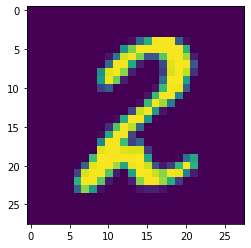

In [90]:
plt.imshow(X_single_data.reshape(28,28).cpu())


In [92]:
print(y_single_data)

tensor([2])
